<a href="https://colab.research.google.com/github/erinbugbee/2023CLIHC-SpeedyIBL-Workshop/blob/main/Solution_IowaGambling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution: Using SpeedyIBL for the Iowa Gambling Task

In the original paper (Bechera and colleagues, 1994), the following procedure was followed:

There were 4 decks of cards (A, B, C, and D).

Participants had to choose in total 100 cards, one at the time.

Each time they choose a card, they get feedback about winning and/or losing some money.

Participants did not know what each card would yield in advance (i.e., like a lottery).

Participants started with a "loan" of $2000 and were told to make a profit.

Decks A and B always yielded $100.

Decks C and D always yielded $50.

For each card chosen, there is a 50% chance of having to pay a penalty as well. For decks A and B, the penalty is \$250, whereas for decks C and D it is \$50.

Learn more about the task here: https://www.psytoolkit.org/experiment-library/igt.html

In [1]:
%pip install -U speedyibl
from speedyibl import Agent

# Define an agent
agent = Agent(default_utility=110)

# Define options
options = ["A", "B", "C", "D"]

import random
# Define a reward function
def reward(choice):
    # Choice A or B
    if choice == "A" or choice == "B":
        r = 100
        if random.random() <= 0.5:
            r -= 250
    # Choice C or D
    else:
        r = 50
        if random.random() <= 0.5:
            r -= 50
    return r


[notice] A new release of pip available: 22.3 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Run experiments
import time # to calculate time
runs = 1000 # number of runs (participants)
trials = 100 # number of trials (episodes)


def run(agent, reward, n_runs, trials):
  average_p = [] # to store average of performance (proportion of maximum reward expectation choice)
  average_r = []
  average_time = [] # to save time
  for r in range(n_runs):
    pmax = []
    rewards = []
    ttime = [0]
    agent.reset() #clear the memory for a new run
    for i in range(trials):
      start = time.time()
      choice = agent.choose(options) # choose one option from the list of two
      # determine the reward that agent can receive
      re = reward(choice)
      # store the instance
      agent.respond(re)
      end = time.time()
      ttime.append(ttime[-1] + end - start)
      pmax.append(choice == "C" or choice == "D")
      rewards.append(re)
    average_p.append(pmax) # save performance of each run
    average_r.append(rewards)
    average_time.append(ttime) # save time of each run
  return average_r, average_p

In [ ]:
# Run for 1000 runs and 100 trials with defined reward function
average_r, average_p = run(agent, reward, runs, trials)

/var/folders/nx/tzjbcd290654zb8tj3sxfl500000gn/T/ipykernel_39997/4173549612.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(trials), np.mean(np.asarray(average_p),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')


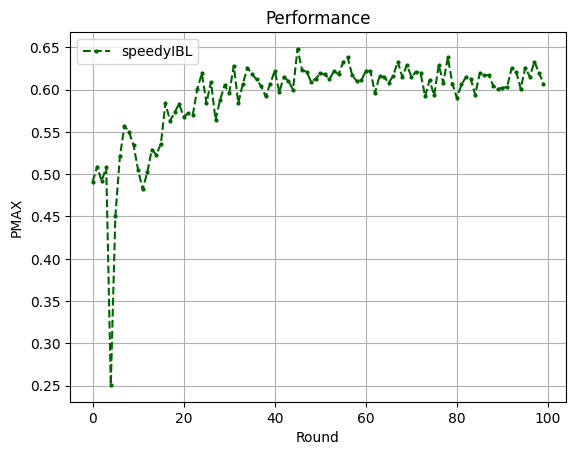

In [3]:
# For plotting
import matplotlib.pyplot as plt
import numpy as np

# Plot PMAX over rounds, which is the proportion of choices that are the options with the maximum reward expectation (Choice C or D)
plt.plot(range(trials), np.mean(np.asarray(average_p), axis=0), "o-", color = "darkgreen", markersize=2, linestyle = "--", label = "speedyIBL")
plt.xlabel("Round")
plt.ylabel("PMAX")
plt.title("Performance")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/nx/tzjbcd290654zb8tj3sxfl500000gn/T/ipykernel_39997/4149620113.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(trials), np.mean(np.asarray(average_r),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')


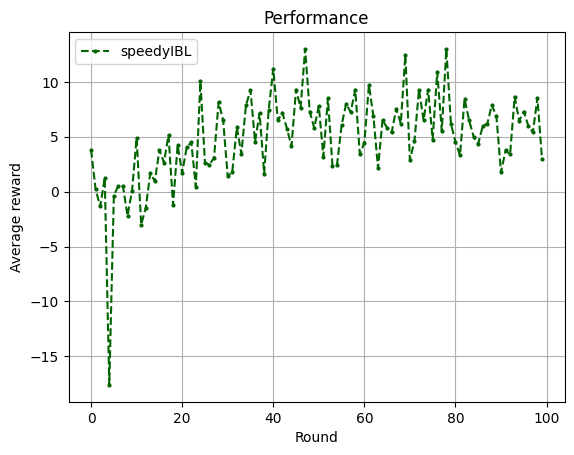

In [4]:
# Plot Average Reward over rounds
plt.plot(range(trials), np.mean(np.asarray(average_r), axis=0), "o-", color = "darkgreen", markersize = 2, linestyle = "--", label = "speedyIBL")
plt.xlabel("Round")
plt.ylabel("Average Reward")
plt.title("Performance")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Initialize agent with default utility of 10 instead of 110
agent = Agent(default_utility=10)
average_r, average_p = run(agent, reward, runs, trials)

/var/folders/nx/tzjbcd290654zb8tj3sxfl500000gn/T/ipykernel_39997/99465264.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(trials), np.mean(np.asarray(average_p),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')


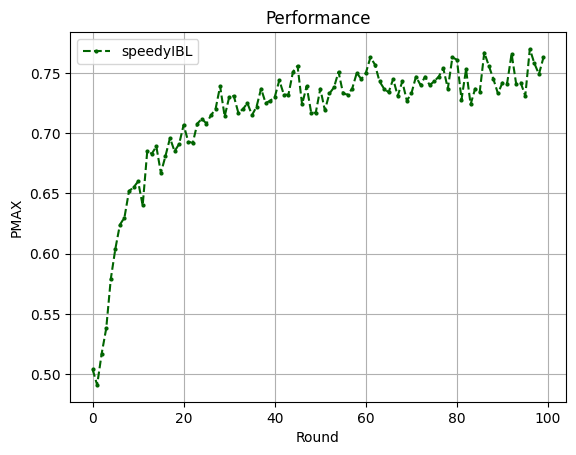

In [5]:
# Plot PMAX over rounds with default utility 10
plt.plot(range(trials), np.mean(np.asarray(average_p), axis=0), "o-", color = "darkgreen", markersize=2, linestyle = "--", label = "speedyIBL")
plt.xlabel("Round")
plt.ylabel("PMAX")
plt.title("Performance")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/nx/tzjbcd290654zb8tj3sxfl500000gn/T/ipykernel_39997/2972735597.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(trials), np.mean(np.asarray(average_r),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')


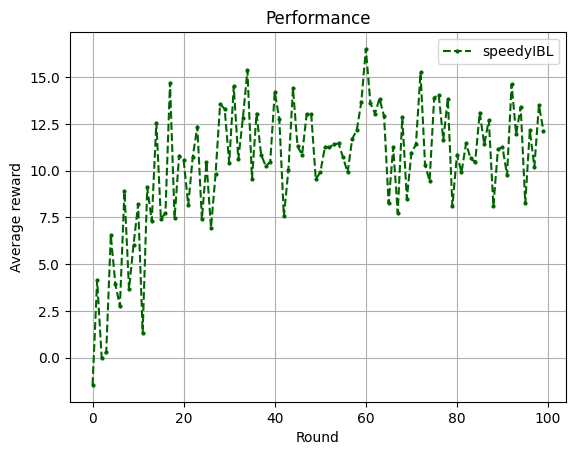

In [6]:
# Plot Average Reward over rounds with default utility 10
plt.plot(range(trials), np.mean(np.asarray(average_r), axis=0), "o-", color = "darkgreen", markersize = 2, linestyle = "--", label = "speedyIBL")
plt.xlabel("Round")
plt.ylabel("Average Reward")
plt.title("Performance")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Vary the noise (default = 0.25) and decay (default = 0.5) parameters and plot the PMAX and Average Reward over rounds with default utility 110
agent = Agent(default_utility=110, noise=0.5, decay=0)

# Run the simulation
average_r, average_p = run(agent, reward, runs, trials)

In [ ]:
# Plot PMAX over rounds with varied noise and decay
plt.plot(range(trials), np.mean(np.asarray(average_p), axis=0), "o-", color = "darkgreen", markersize=2, linestyle = "--", label = "speedyIBL")
plt.xlabel("Round")
plt.ylabel("PMAX")
plt.title("Performance")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plot Average Reward over rounds with varied noise and decay
plt.plot(range(trials), np.mean(np.asarray(average_r), axis=0), "o-", color = "darkgreen", markersize = 2, linestyle = "--", label = "speedyIBL")
plt.xlabel("Round")
plt.ylabel("Average Reward")
plt.title("Performance")
plt.legend()
plt.grid(True)
plt.show()